In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Session - 10/Assignment - B')

In [3]:
import pandas as pd
colnames = ['Class_ID', 'IMG_HT', 'IMG_WD', 'BBOX_Y1', 'BBOX_X1', 'BBOX_Y2', 'BBOX_X2', 'Blank']
coco_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Session - 10/Assignment - B/sample_coco.txt", names= colnames)
coco_df = coco_df.drop(['Blank'], axis = 1)
coco_df['Class_ID'] = coco_df['Class_ID'].str[4:]
coco_df['IMG_HT'] = coco_df['IMG_HT'].str[9:]
coco_df['IMG_WD'] = coco_df['IMG_WD'].str[8:]
coco_df['BBOX_Y1'] = coco_df['BBOX_Y1'].str[7:]
coco_df['BBOX_X2'] = coco_df['BBOX_X2'].str[1:-1]
coco_df["Class_ID"] = pd.to_numeric(coco_df["Class_ID"])
coco_df = coco_df.sort_values(["Class_ID"])

coco_df.head(3)

,Class_ID,IMG_HT,IMG_WD,BBOX_Y1,BBOX_X1,BBOX_Y2,BBOX_X2
0,0,330,1093,69,464,312,175
1026,0,763,821,498,471,252,116
6245,0,669,304,25,24,85,346


In [4]:
coco_df['BBOX_HT'] = abs(pd.to_numeric(coco_df['BBOX_Y1']) - pd.to_numeric(coco_df['BBOX_Y2']))
coco_df['BBOX_WT'] = abs(pd.to_numeric(coco_df['BBOX_X1']) - pd.to_numeric(coco_df['BBOX_X2']))
coco_df.head(3)

,Class_ID,IMG_HT,IMG_WD,BBOX_Y1,BBOX_X1,BBOX_Y2,BBOX_X2,BBOX_HT,BBOX_WT
0,0,330,1093,69,464,312,175,243,289
1026,0,763,821,498,471,252,116,246,355
6245,0,669,304,25,24,85,346,60,322


In [5]:
coco_bbox_df = pd.DataFrame()
coco_bbox_df['BBOX_HT'] = coco_df['BBOX_HT']
coco_bbox_df['BBOX_WT'] = coco_df['BBOX_WT']

In [6]:
coco_bbox_df.head(3)

,BBOX_HT,BBOX_WT
0,243,289
1026,246,355
6245,60,322


In [7]:
coco_arr = coco_bbox_df.to_numpy()
type(coco_arr)
print(coco_arr[1])

[246 355]


### Class Distribution

Text(0, 0.5, 'Frequency')

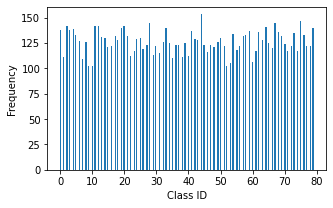

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,3))
plt.hist(coco_df['Class_ID'],bins=200)
plt.xlabel('Class ID')
plt.ylabel('Frequency')

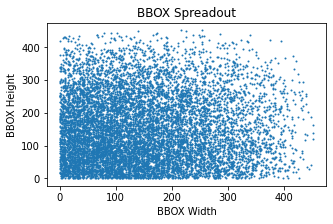

In [9]:
plt.figure(figsize = (5,3))
plt.scatter(coco_df['BBOX_WT'],coco_df['BBOX_HT'],s=1)
plt.xlabel('BBOX Width')
plt.ylabel('BBOX Height')
plt.title('BBOX Spreadout')
plt.show()

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

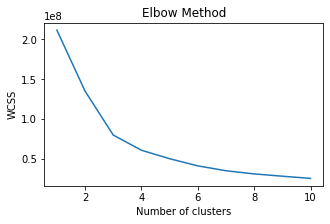

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=350, n_init=10, random_state=0)
    kmeans.fit(coco_bbox_df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (5,3))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

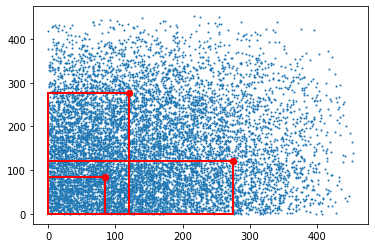

In [22]:
from matplotlib import patches
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=350, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(coco_bbox_df)
plt.scatter(coco_bbox_df['BBOX_WT'],coco_bbox_df['BBOX_HT'],s=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=40, c='red')
for i in range (len(kmeans.cluster_centers_[:, 0])):

  ax.add_patch ( Rectangle(  (0, 0),
                        kmeans.cluster_centers_[:, 0][i], kmeans.cluster_centers_[:, 1][i],
                        fc='none',
                        color=color,
                        linewidth = 2
                        ) )
plt.show()

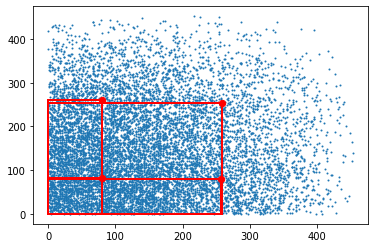

In [21]:
fig, ax = plt.subplots()
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=350, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(coco_bbox_df)
plt.scatter(coco_bbox_df['BBOX_WT'],coco_bbox_df['BBOX_HT'],s=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=40, c='red')
for i in range (len(kmeans.cluster_centers_[:, 0])):

  ax.add_patch ( Rectangle(  (0, 0),
                        kmeans.cluster_centers_[:, 0][i], kmeans.cluster_centers_[:, 1][i],
                        fc='none',
                        color=color,
                        linewidth = 2
                        ) )
plt.show()

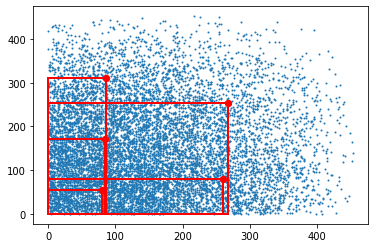

In [18]:
fig, ax = plt.subplots()
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=350, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(coco_bbox_df)
plt.scatter(coco_bbox_df['BBOX_WT'],coco_bbox_df['BBOX_HT'],s=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=40, c='red')
for i in range (len(kmeans.cluster_centers_[:, 0])):

  ax.add_patch ( Rectangle(  (0, 0),
                        kmeans.cluster_centers_[:, 0][i], kmeans.cluster_centers_[:, 1][i],
                        fc='none',
                        color=color,
                        linewidth = 2
                        ) )
plt.show()

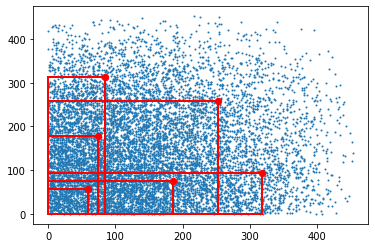

In [19]:
fig, ax = plt.subplots()
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=350, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(coco_bbox_df)
plt.scatter(coco_bbox_df['BBOX_WT'],coco_bbox_df['BBOX_HT'],s=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=40, c='red')
for i in range (len(kmeans.cluster_centers_[:, 0])):

  ax.add_patch ( Rectangle(  (0, 0),
                        kmeans.cluster_centers_[:, 0][i], kmeans.cluster_centers_[:, 1][i],
                        fc='none',
                        color=color,
                        linewidth = 2
                        ) )
plt.show()